---
title: 1D Lagrange Interpolation
venue: Modules
---

The following demonstration has been taken from the online tutorial https://www.matecdev.com/posts/julia-interpolation.html.

Let $n+1$ arbitrary points in 1D be given as $x_0,x_2,\dots,x_n$. Assume a function $f$ which takes the values $f(x_i)=y_i,i=0,\dots,n$ on these points. Then there exists a polynomial $p(x)$ of degree not more than $n$ such that $p(x_i)=y_i, 0=1,\dots,n$.

<b> Procedure for finding the coefficients of $p(x)$: </b>

$p(x)=\sum_{i=0}^n y_i\cdot s_i(x)$, where each polynomial $s_i(x)$ is given as 
\begin{equation}
s_i(x):=\frac{\prod_{j=0,j\neq i}^n (x-x_j)}{\prod_{j=0,j\neq i}^n (x_i-x_j)}
\end{equation}

The above formula can be written in another way which makes it slightly easier for implementation, which is the so-called <b>barycentric</b> form with barycentric weights $b_i, i=1,\dots,n$:
\begin{equation}
p(x)=\frac{\sum_{i=1}^n b_i y_i\  t_i(x)}{\sum_{i=1}^n b_i t_i(x)}, 
\end{equation}

where the $n+1$ constants coefficients are 
\begin{equation}
b_i= \prod_{j=0,j\neq i}^n (x_i-x_j)^{-1}, i=0,\dots,n
\end{equation} 
and the $n+1$  basis functions are:

\begin{equation}
   t_i(x) = (x-x_i)^{-1}
\end{equation}

In [1]:
function LagrangeInterp1D( fvals, xnodes, barw, t )
    numt = 0
    denomt = 0

    for j = 1 : length( xnodes )
        tdiff = t - xnodes[j]
        numt = numt + barw[j] / tdiff * fvals[j]
        denomt = denomt + barw[j] / tdiff

        if ( abs(tdiff) < 1e-15 )
            numt = fvals[j]
            denomt = 1.0
            break
        end
    end

    return numt / denomt

end

LagrangeInterp1D (generic function with 1 method)

For equidistant node points, the barycentric weights can be explicitly calculated as

$b_i=(-1)^{i} \binom{n}{i} $

In [2]:
# n+1 equispaced points between -1 and 1
EquispacedNodes(n) = [2*(j/n-0.5) for j=0:n]
EquispacedBarWeights(n) = [ (-1)^j * binomial(n,j) for j=0:n ]

EquispacedBarWeights (generic function with 1 method)

Test the interpolation on the following function:

In [3]:
f(x) = 1/(1 + 16*x^2)


f (generic function with 1 method)

Interpolate $f(x)$ using 17 equidistant points within $[-1,1]$:

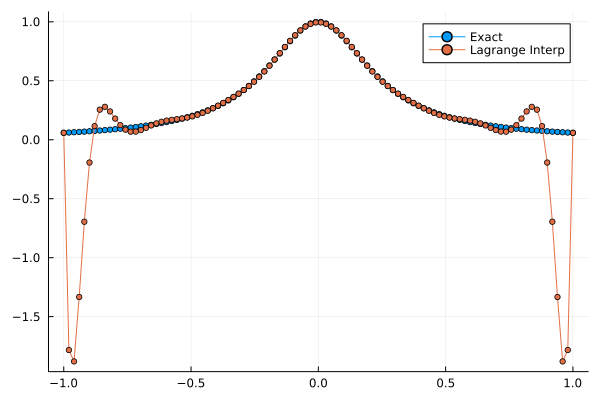

In [4]:
using Plots

# Sampling
n = 17;
xnodes = EquispacedNodes(n);
w = EquispacedBarWeights(n);
f_sample = f.(xnodes);

# Interpolation
t = LinRange(-1,1,100)
f_interp = [LagrangeInterp1D( f_sample, xnodes, w, t[j] ) for j=1:length(t)]
plot(t,f.(t), label="Exact", marker = 3)
plot!(t,f_interp, label="Lagrange Interp", marker = 3)

Equidistant interpolation points give rise to Runge's phenomenon, as indicated by the massive overshooting behavior above. Different choice of interpolation points such as Chebychev points can be used to solve this issue, which are defined as: 

$x_i=\cos\left(\frac{i \pi}{n}\right),i=0,\dots, n $

The barycentric weights for the Chebychev points assume a particularly simple form:

\begin{equation}
b_i=\begin{cases}
\frac{1}{2}\cdot (-1)^i &\text{ if } i = 0,n \\
(-1)^i  &\text{ if } i=1,\dots,n-1
\end{cases}
\end{equation}

In [5]:
# Chebyshev points of the second kind
ClosedChebNodes(n) = [cos(j*pi/n) for j=0:n]
ClosedChebBarWeights(n) = [0.5; [(-1)^j for j=1:n-1]; 0.5*(-1)^n]

ClosedChebBarWeights (generic function with 1 method)

Now interpolate based on Chebychev points:

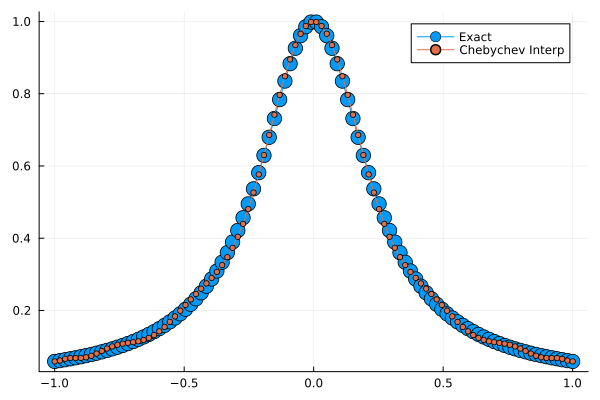

In [6]:
# Sampling 17 Chebychev points
n = 16;
xnodes = ClosedChebNodes(n);
w = ClosedChebBarWeights(n);
f_sample = f.(xnodes);

# Interpolation
t = LinRange(-1,1,100)
f_interp = [LagrangeInterp1D( f_sample, xnodes, w, t[j] ) for j=1:length(t)]
plot(t,f.(t), label="Exact", marker = 8)
plot!(t,f_interp, label="Chebychev Interp", marker = 3)